<a href="https://colab.research.google.com/github/kingcodes02/Time-Series-Forcasting/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.framework.config import list_physical_devices
# Import TensorFlow into Colab
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.9.1
TF Hub version: 0.12.0
GPU available (YESSSS!!!!!)


In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
os.chdir("/content/drive/MyDrive/complete-time-series")

In [11]:
ls

3-Regression/                   5-AutoRegressive/       visulization-data-copy/
4-Forecasting_with_regression/  6-Smooting_Techniques/


### EDA

In [15]:
df = pd.read_excel("//content/drive/MyDrive/complete-time-series/3-Regression/data/regression_data.xlsx")
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


Quantitative Technique

* Central Tendencies
* Measure of Spread 

In [16]:
# shape
df.shape

(27, 2)

In [17]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       27 non-null     float64
 1   y       27 non-null     float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [19]:
print(df.mean())
print(df.median()) 
print(df.mode())

x    2.236667
y    6.070000
dtype: float64
x    2.18
y    3.20
dtype: float64
      x    y
0  1.85  1.7
1  2.18  2.4


In [20]:
# measure of spread
# variance of the
print(df.var())
print(df.std())

x     0.714815
y    24.310415
dtype: float64
x    0.845468
y    4.930559
dtype: float64


In [21]:
# describe 
df.describe()

,x,y
count,27.000000,27.000000
mean,2.236667,6.070000
std,0.845468,4.930559
min,1.200000,1.200000
25%,1.730000,2.300000
50%,2.180000,3.200000
75%,2.520000,9.470000
max,4.600000,17.800000


Graphical Method

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


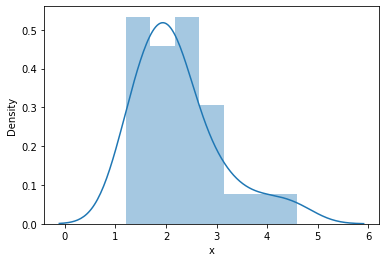

In [25]:
sns.distplot(df['x']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


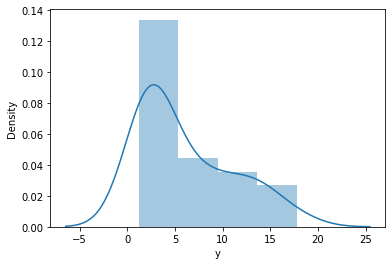

In [26]:
sns.distplot(df['y']);

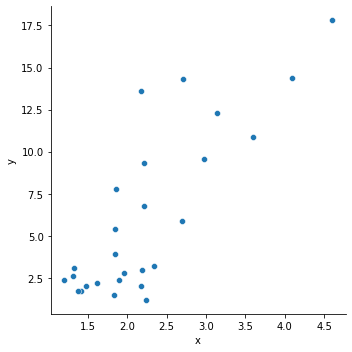

In [28]:
# relationship plot
sns.relplot(x='x', y='y', data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


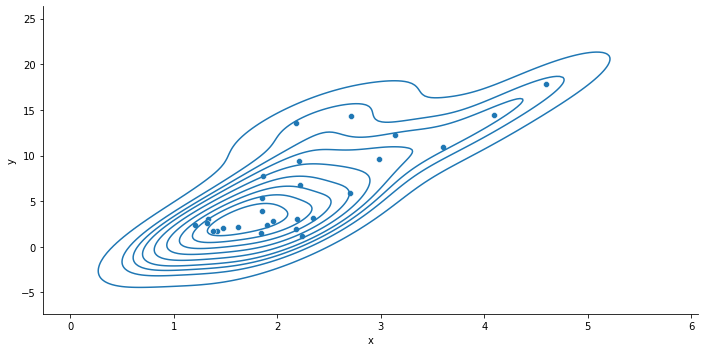

In [31]:
sns.relplot(x='x', y='y', data=df, aspect=2)
sns.kdeplot(df['x'], df['y'])

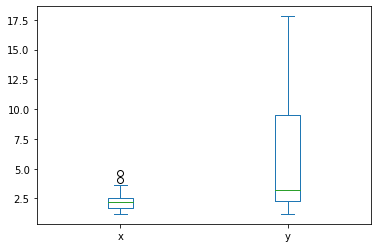

In [32]:
df.plot(kind='box')

In [33]:
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [34]:
# slope of a line b
# b = cov(x, y) / var(x)
cov = df.cov()
cov

,x,y
x,0.714815,3.390746
y,3.390746,24.310415


In [35]:
b = cov['x']['y'] / cov['x']['x']
print('Slope of the line =', b)

Slope of the line = 4.743527107590986


In [36]:
# intercept of the line a
# a = mean(y) - b * mean(x)
a = df['y'].mean() - b * df['x'].mean()
print("Intercept of the line =", a)

Intercept of the line = -4.539688963978507


In [37]:
def model_equation(x):
  y_hat = a + b * x
  return y_hat

In [38]:
model_equation(3)

9.690892358794454

In [41]:
y_pred = model_equation(df['x'])

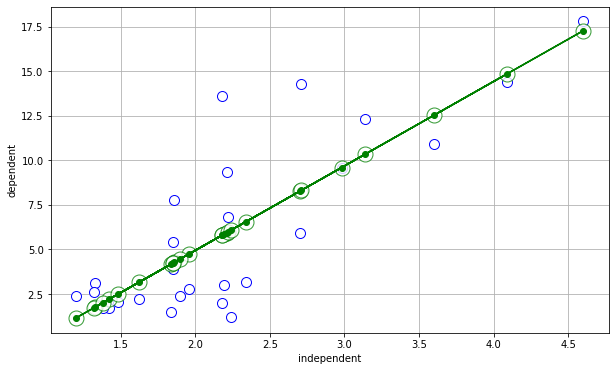

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], 'bo', markersize=10, markerfacecolor='w')
# linear regression line
plt.plot(df['x'], y_pred, 'go', markersize=15, markerfacecolor='w', alpha=0.8)
plt.plot(df['x'], y_pred, 'g')
plt.plot(df['x'], y_pred, 'go')

plt.xlabel('independent')
plt.ylabel('dependent')
plt.grid();

### Linear Regression with Statsmodel

In [55]:
# OLS
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [56]:
df.head()

,x,y
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


In [57]:
# linear regression: ordinary least square regression (OLS)
model_sm = sm.OLS.from_formula(formula='y~x', data=df).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           2.50e-07
Time:                        18:35:12   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5397      1.619     -2.805      0.0

In [60]:
test_data = pd.DataFrame([[3]], columns=['x'])
model_sm.predict(test_data)

0    9.690892
dtype: float64

In [61]:
fittedvalue = model_sm.fittedvalues

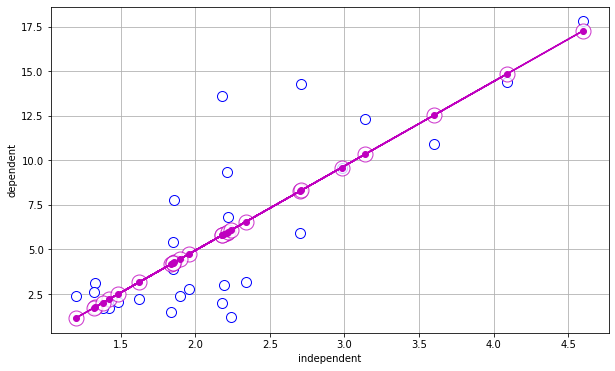

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], 'bo', markersize=10, markerfacecolor='w')
# linear regression line
plt.plot(df['x'], fittedvalue, 'mo', markersize=15, markerfacecolor='w', alpha=0.8)
plt.plot(df['x'], fittedvalue, 'm')
plt.plot(df['x'], fittedvalue, 'mo')

plt.xlabel('independent')
plt.ylabel('dependent')
plt.grid();

Model Evaluation
* SST, SSR, SSE
* MSE
* $R^2$

In [66]:
# df['y']
def sum_of_square(y_value):
  mean_y = y_value.mean()
  ss = np.sum(np.square(y_value - mean_y))
  return ss

In [67]:
SST = sum_of_square(df['y'])
print(SST)

632.0708000000001


In [68]:
SSR = sum_of_square(fittedvalue)
print(SSR)

418.18650368895675


In [69]:
SSE = SST - SSR
print(SSE)

213.88429631104333


In [70]:
# MSE (Mean Square Error)
n = len(df)
k = 1 # no of independent variable
MSE = SSE / (n-k)
print(MSE)

8.226319088886282


In [71]:
# R-square (explained variance)
R_square = SSR / SST
print(R_square)

0.6616133883877513
